<a href="https://colab.research.google.com/github/Devansh-0/Unsupervised-Pet-Breed-Classification/blob/main/Dog_Breed_Classification_using_VGG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import time
import os, os.path
import random
import cv2
import glob
import keras
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

import pandas as pd
import numpy as np
# directory where images are stored
DIR = "/content/drive/MyDrive/Animal Images"

def dataset_stats():

    # This is an array with the letters available.
    # If you add another animal later, you will need to structure its images in the same way
    # and add its letter to this array
    animal_characters = ['C', 'D']

    # dictionary where we will store the stats
    stats = []

    for animal in animal_characters:
        # get a list of subdirectories that start with this character
        directory_list = sorted(glob.glob("{}/[{}]*".format(DIR, animal)))

        for sub_directory in directory_list:
            file_names = [file for file in os.listdir(sub_directory)]
            file_count = len(file_names)
            sub_directory_name = os.path.basename(sub_directory)
            stats.append({ "Code": sub_directory_name[:sub_directory_name.find('-')],
                            "Image count": file_count,
                           "Folder name": os.path.basename(sub_directory),
                            "File names": file_names})


    df = pd.DataFrame(stats)

    return df

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

# Define constants
IMG_WIDTH, IMG_HEIGHT = 224, 224
NUM_CLASSES = 4  # Number of dog breeds
BATCH_SIZE = 32

# Define data generators for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/ANIMAL 2',
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/ANIMAL 2',
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Load pre-trained VGG16 model without top (fully connected) layers
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_WIDTH, IMG_HEIGHT, 3))

# Freeze convolutional layers
for layer in vgg16_base.layers:
    layer.trainable = False

# Build model architecture
model = Sequential([
    vgg16_base,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')
])

# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

# Evaluate model
_, accuracy = model.evaluate(validation_generator, verbose=0)
print("Accuracy on validation set:", accuracy)


Found 636 images belonging to 4 classes.
Found 156 images belonging to 4 classes.
Epoch 1/10
19/19 [==============================] - 513s 26s/step - loss: 4.6080 - accuracy: 0.4454 - val_loss: 0.4880 - val_accuracy: 0.8438
Epoch 2/10
19/19 [==============================] - 480s 25s/step - loss: 0.5736 - accuracy: 0.8046 - val_loss: 0.3612 - val_accuracy: 0.8750
Epoch 3/10
19/19 [==============================] - 531s 28s/step - loss: 0.2779 - accuracy: 0.9089 - val_loss: 0.2226 - val_accuracy: 0.9453
Epoch 4/10
19/19 [==============================] - 471s 25s/step - loss: 0.2017 - accuracy: 0.9338 - val_loss: 0.3262 - val_accuracy: 0.9062
Epoch 5/10
19/19 [==============================] - 531s 28s/step - loss: 0.1686 - accuracy: 0.9487 - val_loss: 0.3045 - val_accuracy: 0.9297
Epoch 6/10
19/19 [==============================] - 530s 28s/step - loss: 0.1250 - accuracy: 0.9619 - val_loss: 0.2415 - val_accuracy: 0.9297
Epoch 7/10
19/19 [==============================] - 470s 25s/step 

### Saving Model

In [ ]:
# Save the model
model.save('/content/drive/MyDrive/ANIMAL 2/model.keras')


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('/content/drive/MyDrive/ANIMAL 2/model.keras')


### Testing the Predictions

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load and preprocess the sample image
img_path = '/content/stbernard_adult.jpg'
img = image.load_img(img_path, target_size=(IMG_WIDTH, IMG_HEIGHT))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.  # Rescale pixel values to [0, 1]

# Make predictions
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions)
confidence = predictions[0][predicted_class]

# Print the predicted class and confidence
print("Predicted class:", predicted_class)
print("Confidence:", confidence)


1/1 [==============================] - 2s 2s/step
Predicted class: 2
Confidence: 0.99971193


1/1 [==============================] - 1s 549ms/step
Predicted class: 0
Confidence: 0.99972457


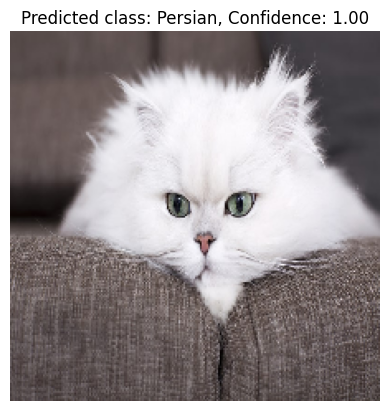

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load and preprocess the sample image
img_path = '/content/Persian+Cat+Facts+History+Personality+and+Care+_+ASPCA+Pet+Health+Insurance+_+white+Persian+cat+resting+on+a+brown+sofa-min.jpg'
img = image.load_img(img_path, target_size=(IMG_WIDTH, IMG_HEIGHT))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.  # Rescale pixel values to [0, 1]

# Make predictions
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions)
confidence = predictions[0][predicted_class]

# Print the predicted class and confidence
print("Predicted class:", predicted_class)
print("Confidence:", confidence)

# Define a dictionary mapping class indices to class names
class_names = {0: 'Persian', 1: 'Sphynx', 2: 'Bernard', 3: 'Yorkshire'}  # Add your class names here

# Get the class name corresponding to the predicted class
predicted_class_name = class_names.get(predicted_class, 'Unknown')

# Display the image with the predicted class as the title
plt.imshow(img)
plt.title(f'Predicted class: {predicted_class_name}, Confidence: {confidence:.2f}')
plt.axis('off')
plt.show()


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('/content/drive/MyDrive/ANIMAL 2/model.keras')

# Function to preprocess the user-provided image
def preprocess_image(image_path, target_size):
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.  # Rescale pixel values to [0, 1]
    return img_array

# Function to predict class and confidence percentage
def predict_image_class(image_path, model):

    IMG_WIDTH, IMG_HEIGHT = 224, 224
    # Preprocess the image
    img_array = preprocess_image(image_path, target_size=(IMG_WIDTH, IMG_HEIGHT))


    # Make predictions using the loaded model
    predictions = model.predict(img_array)

    # Get the predicted class and confidence percentage
    predicted_class = np.argmax(predictions)
    confidence = predictions[0][predicted_class]

    return predicted_class, confidence

# Path to the user-provided image
user_image_path = '/content/Persian+Cat+Facts+History+Personality+and+Care+_+ASPCA+Pet+Health+Insurance+_+white+Persian+cat+resting+on+a+brown+sofa-min.jpg'

# Predict class and confidence percentage for the user-provided image
predicted_class, confidence = predict_image_class(user_image_path, loaded_model)

# Print the predicted class and confidence
print("Predicted class:", predicted_class)
print("Confidence:", confidence)


1/1 [==============================] - 3s 3s/step
Predicted class: 0
Confidence: 0.99972457


# Deployment

In [ ]:
!pip install flask-ngrok


In [ ]:
!pip install pyngrok

In [ ]:
import os
import threading
from flask import Flask, request, jsonify
from pyngrok import ngrok
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import uuid

# Set ngrok authtoken
ngrok.set_auth_token('2czz8VAKhjeJNINh3hlCrV4uciZ_7neiSSNMhED56h2wKdfQt')
model = load_model('/content/drive/MyDrive/ANIMAL 2/model.keras')  # Load your saved model

app = Flask(__name__)
port = "5000"

# Ensure the correct path for static files
app._static_folder = "/content/static"

# Function to preprocess the user-provided image
def preprocess_image(image_path, target_size):
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.  # Rescale pixel values to [0, 1]
    return img_array

# Function to predict class and confidence percentage
def predict_image_class(image_path, model):
    img_array = preprocess_image(image_path, target_size=(224, 224))  # Assuming IMG_WIDTH and IMG_HEIGHT are 224
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)
    confidence = predictions[0][predicted_class]
    return predicted_class, confidence

# Define Flask routes
@app.route("/")
def upload_file():
    return '''
    <!DOCTYPE html>
    <html>
    <head>
        <title>Image Upload</title>
    </head>
    <body>
        <h2>Upload an Image</h2>
        <form action="/predict" method="post" enctype="multipart/form-data">
            <input type="file" name="image" accept="image/*">
            <input type="submit" value="Upload">
        </form>
    </body>
    </html>
    '''

@app.route('/predict', methods=['POST'])
def predict():
    if request.method == 'POST':
        # Get the uploaded image file
        img_file = request.files['image']
        if img_file:
            # Generate a unique filename for the uploaded image
            img_filename = str(uuid.uuid4()) + '.jpg'
            img_path = os.path.join(app._static_folder, img_filename)
            img_file.save(img_path)
            print("Image received and saved successfully:", img_path)  # Print a message indicating successful save
            # Predict class and confidence percentage
            predicted_class, confidence = predict_image_class(img_path, model)
            # Embed the result directly in the response
            return '''
            <!DOCTYPE html>
            <html>
            <head>
                <title>Result</title>
            </head>
            <body>
                <h2>Result</h2>
                <p><strong>Predicted Class:</strong> ''' + str(predicted_class) + '''</p>
                <p><strong>Confidence:</strong> ''' + str(confidence) + '''</p>
            </body>
            </html>
            '''
    return jsonify({'error': 'No image uploaded'})

# Start the Flask server in a new thread
public_url = ngrok.connect(port).public_url
print(f" * ngrok tunnel \"{public_url}\" -> \"http://127.0.0.1:{port}\"")
threading.Thread(target=app.run, kwargs={"use_reloader": False}).start()


 * ngrok tunnel "https://48b3-34-148-122-39.ngrok-free.app" -> "http://127.0.0.1:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
